In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from tqdm import tqdm
import time

In [2]:
# Input Dataset 

DM = pd.read_csv("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CIC-PDFMal2022\\PDFMalware2022.csv") #DM--> Dataset Malware

In [3]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [4]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM['Class'] == "Benign"]
MalwareData = DM[DM['Class'] == "Malicious"]

In [5]:
# Histogram penyebaran data benign dan malware pada fitur Fine name.
x = BenignData["Fine name"]
y = MalwareData["Fine name"]
bins = np.linspace(0, 1500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Fine name")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

KeyboardInterrupt: 

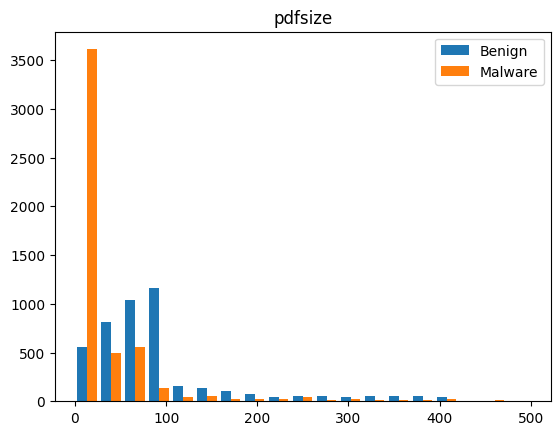

In [6]:
# Histogram penyebaran data benign dan malware pada fitur pdfsize.
x = BenignData["pdfsize"]
y = MalwareData["pdfsize"]
bins = np.linspace(0, 500, 20) # Berbeda karena mayoritas data bernilai 0 sampai 500, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pdfsize")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

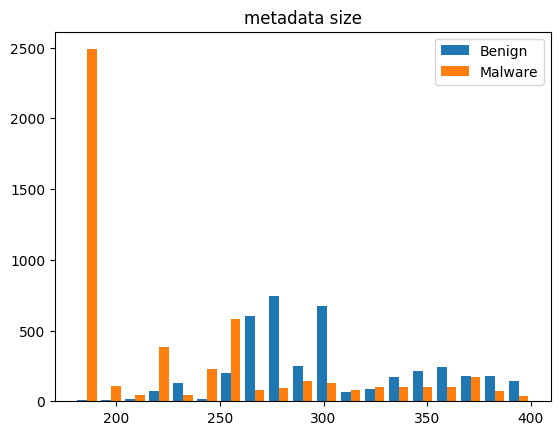

In [7]:
# Histogram penyebaran data benign dan malware pada fitur metadata size.
x = BenignData["metadata size"]
y = MalwareData["metadata size"]
bins = np.linspace(180, 400, 20) # Berbeda karena mayoritas data bernilai 180 sampai 400, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("metadata size")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

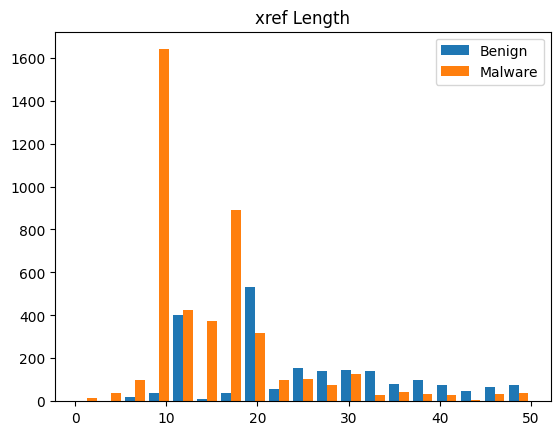

In [8]:
# Histogram penyebaran data benign dan malware pada fitur xref Length.
x = BenignData["xref Length"]
y = MalwareData["xref Length"]
bins = np.linspace(0, 50, 20) # Berbeda karena mayoritas data bernilai 0 sampai 50, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("xref Length")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

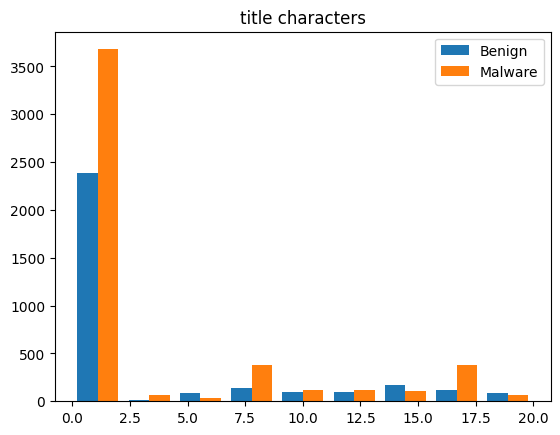

In [9]:
# Histogram penyebaran data benign dan malware pada fitur title characters.
x = BenignData["title characters"]
y = MalwareData["title characters"]
bins = np.linspace(0, 20, 10) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("title characters")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

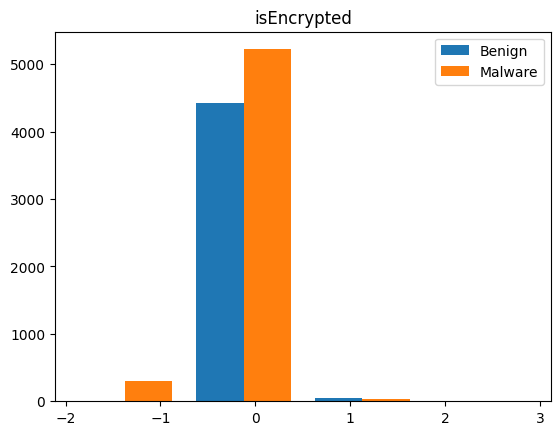

In [10]:
# Histogram penyebaran data benign dan malware pada fitur isEncrypted.
x = BenignData["isEncrypted"]
y = MalwareData["isEncrypted"]
bins = np.linspace(-2, 3, 5) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("isEncrypted")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

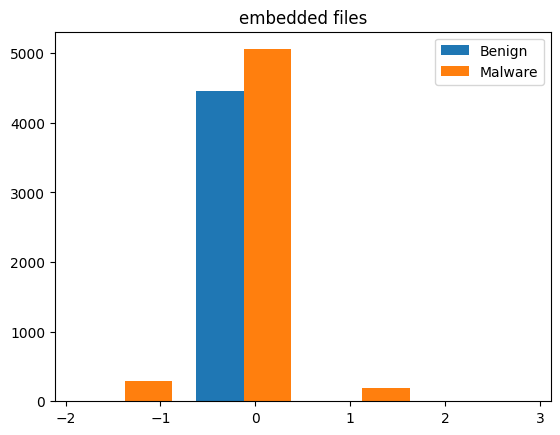

In [11]:
# Histogram penyebaran data benign dan malware pada fitur embedded files.
x = BenignData["embedded files"]
y = MalwareData["embedded files"]
bins = np.linspace(-2, 3, 5) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("embedded files")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

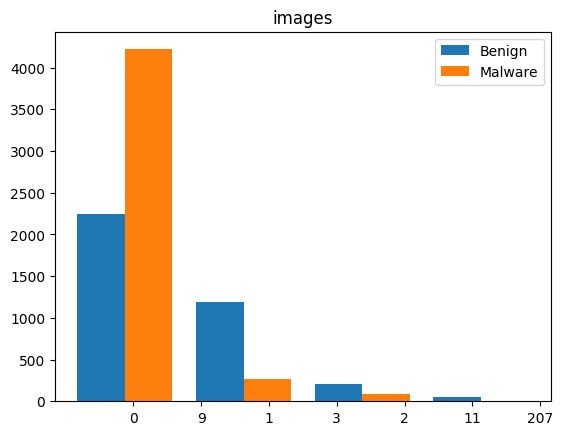

In [12]:
# Histogram penyebaran data benign dan malware pada fitur images.
x = BenignData["images"]
y = MalwareData["images"]
bins = np.linspace(-1, 6, 5) # Berbeda karena mayoritas data bernilai -1 sampai 6, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("images")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

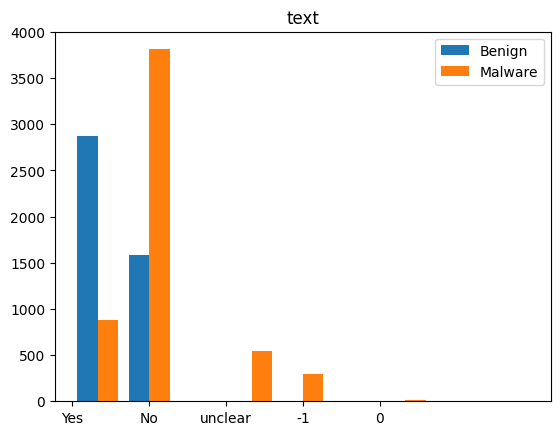

In [13]:
# Histogram penyebaran data benign dan malware pada fitur text.
x = BenignData["text"]
y = MalwareData["text"]
bins = np.linspace(0, 6, 10) # Berbeda karena mayoritas data bernilai 0 sampai 6, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("text")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


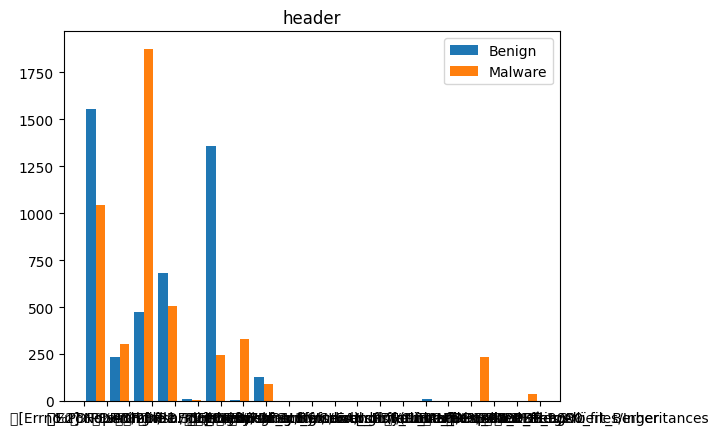

In [14]:
# Histogram penyebaran data benign dan malware pada fitur header.
x = BenignData["header"]
y = MalwareData["header"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("header")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['10', '19', '12', ..., '8', '9', '299'], dtype=object)

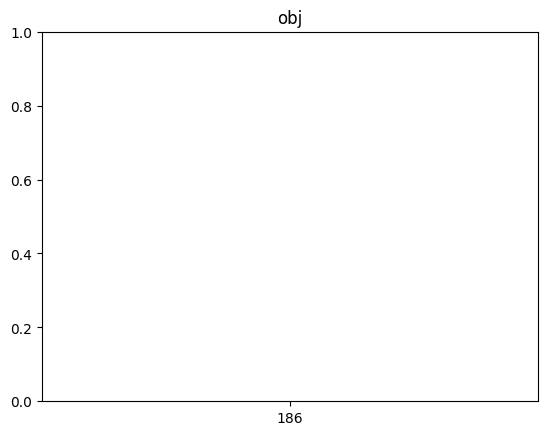

In [15]:
# Histogram penyebaran data benign dan malware pada fitur obj.
x = BenignData["obj"]
y = MalwareData["obj"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("obj")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur endobj.
x = BenignData["endobj"]
y = MalwareData["endobj"]
bins = np.linspace(0, 20, 20) # Berbeda karena mayoritas data bernilai 0 sampai 20, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("endobj")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur stream.
x = BenignData["stream"]
y = MalwareData["stream"]
bins = np.linspace(0, 40, 10) # Berbeda karena mayoritas data bernilai 0 sampai 40, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("stream")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur endstream.
x = BenignData["endstream"]
y = MalwareData["endstream"]
bins = np.linspace(0, 40, 10) # Berbeda karena mayoritas data bernilai 0 sampai 40, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("endstream")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur xref.
x = BenignData["xref"]
y = MalwareData["xref"]
bins = np.linspace(0, 40, 10) # Berbeda karena mayoritas data bernilai 0 sampai 40, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("xref")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur trailer.
x = BenignData["trailer"]
y = MalwareData["trailer"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("trailer")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur startxref.
x = BenignData["startxref"]
y = MalwareData["startxref"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("startxref")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur pageno.
x = BenignData["pageno"]
y = MalwareData["pageno"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("pageno")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur encrypt.
x = BenignData["encrypt"]
y = MalwareData["encrypt"]
bins = np.linspace(-1, 4, 20) # Berbeda karena mayoritas data bernilai -1 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("encrypt")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur ObjStm.
x = BenignData["ObjStm"]
y = MalwareData["ObjStm"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("ObjStm")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur JS.
x = BenignData["JS"]
y = MalwareData["JS"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("JS")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur Javascript.
x = BenignData["Javascript"]
y = MalwareData["Javascript"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Javascript")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '0', '0', ..., '0', '0', '23'], dtype=object)

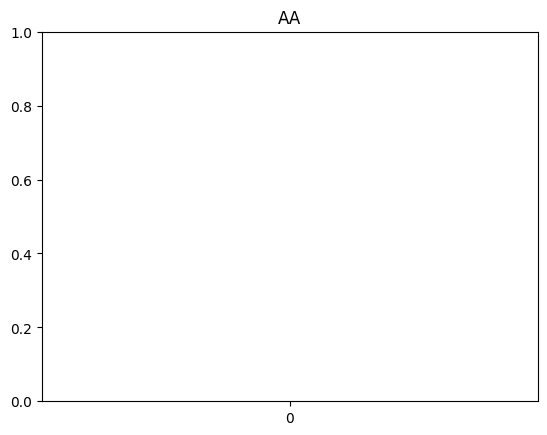

In [16]:
# Histogram penyebaran data benign dan malware pada fitur AA.
x = BenignData["AA"]
y = MalwareData["AA"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("AA")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur OpenAction.
x = BenignData["OpenAction"]
y = MalwareData["OpenAction"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("OpenAction")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

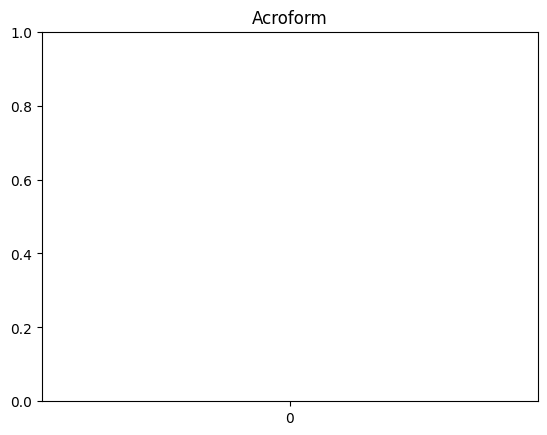

In [17]:
# Histogram penyebaran data benign dan malware pada fitur Acroform.
x = BenignData["Acroform"]
y = MalwareData["Acroform"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Acroform")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur JBIG2Decode.
x = BenignData["JBIG2Decode"]
y = MalwareData["JBIG2Decode"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("JBIG2Decode")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

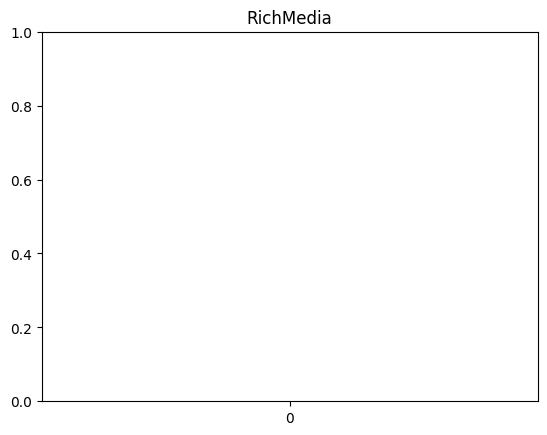

In [18]:
# Histogram penyebaran data benign dan malware pada fitur RichMedia.
x = BenignData["RichMedia"]
y = MalwareData["RichMedia"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("RichMedia")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur launch.
x = BenignData["launch"]
y = MalwareData["launch"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("launch")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['0', '8', '0', ..., '0', '0', '0'], dtype=object)

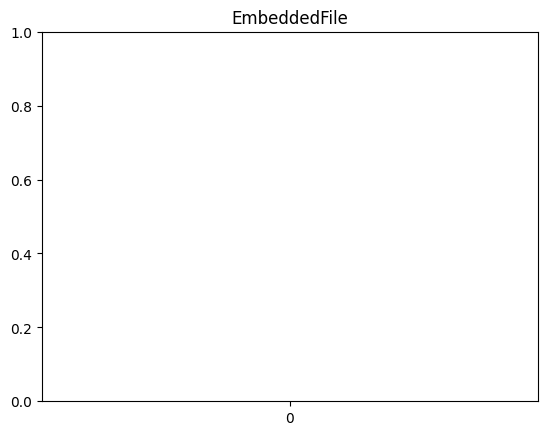

In [19]:
# Histogram penyebaran data benign dan malware pada fitur EmbeddedFile.
x = BenignData["EmbeddedFile"]
y = MalwareData["EmbeddedFile"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("EmbeddedFile")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Histogram penyebaran data benign dan malware pada fitur XFA.
x = BenignData["XFA"]
y = MalwareData["XFA"]
bins = np.linspace(-3, 4, 20) # Berbeda karena mayoritas data bernilai -3 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("XFA")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

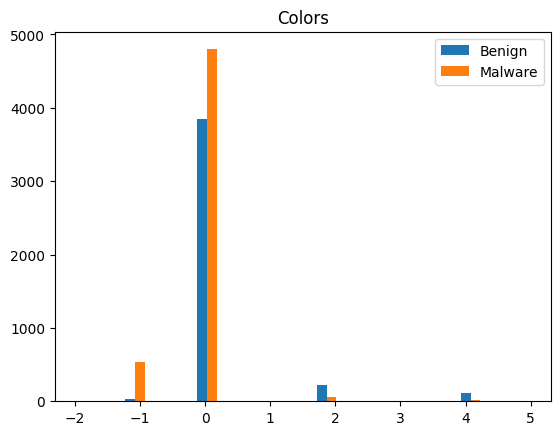

In [20]:
# Histogram penyebaran data benign dan malware pada fitur Colors.
x = BenignData["Colors"]
y = MalwareData["Colors"]
bins = np.linspace(-2, 5, 20) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Colors")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

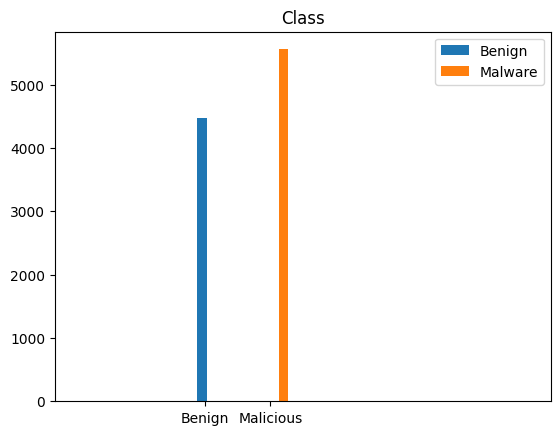

In [21]:
# Histogram penyebaran data benign dan malware pada fitur Class.
x = BenignData["Class"]
y = MalwareData["Class"]
bins = np.linspace(-2, 5, 20) # Berbeda karena mayoritas data bernilai -2 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("Class")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [22]:
# Memilih dan menentukan feature yang berpotensi untuk threshold (Penyebarannya sangat terlihat dan 2 class dapat dipisahkan dengan mudah)
Dataset = DM.drop(['Fine name', 'pdfsize', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'Class'],axis=1).values # mendrop yang penyebarannya sangat kecil atau tidak dapat membendakan 2 class
Target = DM['Class'].values # CLass karena merepresentasikan binary class

In [23]:
# Memilih 100% data secara acak dari setiap fitur/column
sampled_data = DM.groupby('Class').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)
hasil_threshold = []

In [24]:
# Menampilkan list feature yang digunakan
Feature = sampled_data.drop(['Fine name', 'pdfsize', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'Class'],axis=1).columns.tolist()
print("         List Features yang akan dibandingkan kinerja-nya           ")
print("                                                                    ")
print("#   Column                                  Non-Null Count  Dtype   ")
print("---  ------                                  --------------  -----  ")

features = []
for i, column_name in enumerate(Feature):
    print(f"{i+1:3} {column_name:40} {sampled_data[column_name].count():<15} {sampled_data[column_name].dtype}")
    features.append(column_name)

         List Features yang akan dibandingkan kinerja-nya           
                                                                    
#   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----  
  1 metadata size                            10025           float64


In [25]:
print(features)

['metadata size']


In [26]:
def Thresholding(threshold, feature):
    # Mengukur waktu mulai
    start_time = time.time()

    # Melakukan thresholding
    BenignDataThreshold = sampled_data[sampled_data[feature] > int(threshold)]
    MalwareDataThreshold = sampled_data[sampled_data[feature] <= int(threshold)]

    # Untuk BenignDataThreshold
    y_true_benign = ["Benign"] * len(BenignDataThreshold)
    y_pred_benign = BenignDataThreshold["Class"]

    # Untuk MalwareDataThreshold
    y_true_malware = ["Malicious"] * len(MalwareDataThreshold)
    y_pred_malware = MalwareDataThreshold["Class"]

    # Menyatukan true labels dan predicted labels
    y_true = y_true_benign + y_true_malware
    y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Menghitung Precision, Recall, F1-score, dan Accuracy
    PrecisionThreshold = tp / (tp + fp) if (tp + fp) != 0 else 0
    RecallThreshold = tp / (tp + fn) if (tp + fn) != 0 else 0
    F1ScoreThreshold = 2 * ((PrecisionThreshold * RecallThreshold) / (PrecisionThreshold + RecallThreshold)) if (PrecisionThreshold + RecallThreshold) != 0 else 0
    AccuracyThreshold = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0

    # Mengukur waktu selesai
    elapsed_time = time.time() - start_time

    # Menyimpan hasil dalam format satu baris untuk setiap threshold
    hasil_threshold.append([feature, threshold, PrecisionThreshold, RecallThreshold, F1ScoreThreshold, AccuracyThreshold, elapsed_time])

# Lakukan thresholding pada fitur yang dipilih oleh Chi-Square Test
for feature in tqdm(features, desc='Progress'):
    # Pastikan bahwa Min dan Max adalah nilai numerik
    Max = pd.to_numeric(sampled_data[feature], errors='coerce').max()
    Min = pd.to_numeric(sampled_data[feature], errors='coerce').min()

    # Cek apakah Min dan Max valid (bukan NaN)
    if pd.notna(Min) and pd.notna(Max):
        for x in range(int(Min), int(Max + 1)):
            Thresholding(x, feature)
    else:
        print(f"Fitur {feature} mengandung nilai non-numerik dan tidak dapat diproses.")

print(hasil_threshold)

# Mengubah hasil menjadi DataFrame dengan kolom yang sesuai
hasil_threshold_df = pd.DataFrame(hasil_threshold, columns=['Feature', 'Threshold', 'Precision', 'Recall', 'F1_Score', 'Accuracy', 'Elapsed_Time'])

# Simpan DataFrame ke CSV
hasil_threshold_df.to_csv('Manual Feature Selection.csv', index=False)

print("Hasil threshold disimpan ke dalam file 'Manual Feature Selection.csv'")

Progress: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [35:26<00:00, 2126.43s/it]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Hasil threshold disimpan ke dalam file 'Manual Feature Selection.csv'


In [27]:
HasilThreshold = pd.read_csv("C:\\Data Raihan\\Penelitian Threshold\\01-10-2024\\Manual Feature Selection.csv")
HasilThreshold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77187 entries, 0 to 77186
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature       77187 non-null  object 
 1   Threshold     77187 non-null  int64  
 2   Precision     77187 non-null  float64
 3   Recall        77187 non-null  float64
 4   F1_Score      77187 non-null  float64
 5   Accuracy      77187 non-null  float64
 6   Elapsed_Time  77187 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.1+ MB


In [28]:
# Inisialisasi variabel winner untuk masing-masing metrik
winner_precision = ['', '', 0]  # [feature, threshold, value]
winner_recall = ['', '', 0]
winner_f1_score = ['', '', 0]
winner_accuracy = ['', '', 0]
winner_run_time = ['', '', float('inf')]  # Memilih yang terendah, jadi diinisialisasi dengan tak hingga

# Iterasi melalui setiap baris di HasilThreshold
for index, result in HasilThreshold.iterrows():
    # result['Feature'], result['Threshold'], result['Precision'], 
    # result['Recall'], result['F1_Score'], result['Accuracy'],
    # result['Elapsed_Time']
    
    # Membandingkan Precision
    if result['Precision'] > winner_precision[2]:  # result['Precision']
        winner_precision = [result['Feature'], result['Threshold'], result['Precision']]  # [feature, threshold, Precision]
    
    # Membandingkan Recall
    if result['Recall'] > winner_recall[2]:  # result['Recall']
        winner_recall = [result['Feature'], result['Threshold'], result['Recall']]  # [feature, threshold, Recall]

    # Membandingkan F1-score
    if result['F1_Score'] > winner_f1_score[2]:  # result['F1_Score']
        winner_f1_score = [result['Feature'], result['Threshold'], result['F1_Score']]  # [feature, threshold, F1 Score]

    # Membandingkan Accuracy
    if result['Accuracy'] > winner_accuracy[2]:  # result['Accuracy']
        winner_accuracy = [result['Feature'], result['Threshold'], result['Accuracy']]  # [feature, threshold, Accuracy]

    # Membandingkan waktu running (run_time) untuk threshold tercepat (terkecil)
    if result['Elapsed_Time'] < winner_run_time[2]:  # result['Elapsed_Time']
        winner_run_time = [result['Feature'], result['Threshold'], result['Elapsed_Time']]  # [feature, threshold, elapsed_time]

In [29]:
def plot_metrics_for_winner(winner, metric_name):
    winner_feature, winner_threshold = winner[0], winner[1]

    # Memfilter hasil threshold untuk fitur pemenang
    winner_results = HasilThreshold[HasilThreshold['Feature'] == winner_feature]

    # Pisahkan hasil menjadi list berdasarkan threshold dan kolom metrik
    thresholds = winner_results['Threshold'].tolist()  # Threshold
    precision = winner_results['Precision'].tolist()   # Precision
    recall = winner_results['Recall'].tolist()         # Recall
    f1_score = winner_results['F1_Score'].tolist()     # F1 Score
    accuracy = winner_results['Accuracy'].tolist()      # Accuracy

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracy, label='Accuracy', marker='o')
    plt.plot(thresholds, precision, label='Precision', marker='o')
    plt.plot(thresholds, recall, label='Recall', marker='o')
    plt.plot(thresholds, f1_score, label='F1 Score', marker='o')

    plt.title(f'{metric_name} Winner: Metrics vs. Threshold for Feature {winner_feature}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

In [30]:
def plot_runtime_for_winner(winner):
    winner_feature, winner_threshold = winner[0], winner[1]

    # Memfilter hasil threshold untuk fitur pemenang
    winner_results = HasilThreshold[HasilThreshold['Feature'] == winner_feature]

    # Pisahkan hasil menjadi list berdasarkan threshold dan run_time
    thresholds = winner_results['Threshold'].tolist()    # Threshold
    run_time = winner_results['Elapsed_Time'].tolist()   # Run Time (elapsed_time)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, run_time, label='Run Time', marker='o')

    plt.title(f'Run Time Winner: Run Time vs. Threshold for Feature {winner_feature}')
    plt.xlabel('Threshold')
    plt.ylabel('Run Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

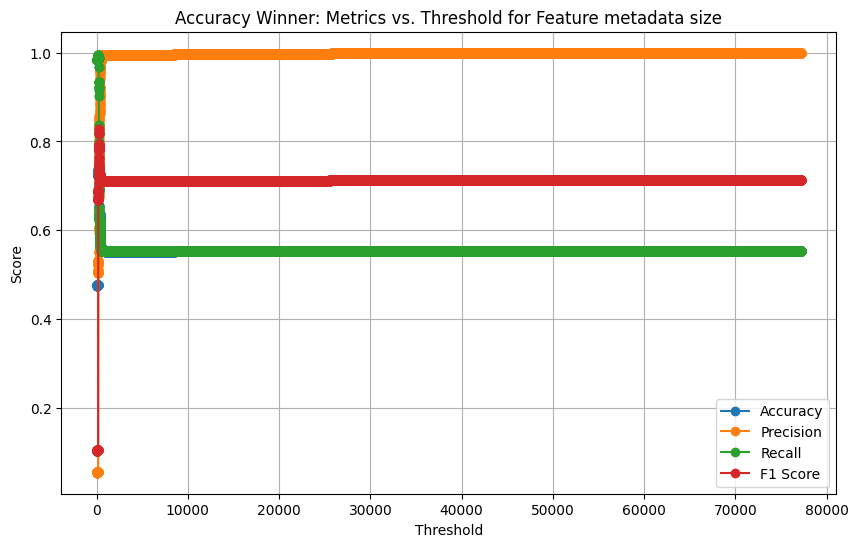

In [31]:
# Plot untuk Accuracy Winner
plot_metrics_for_winner(winner_accuracy, 'Accuracy')

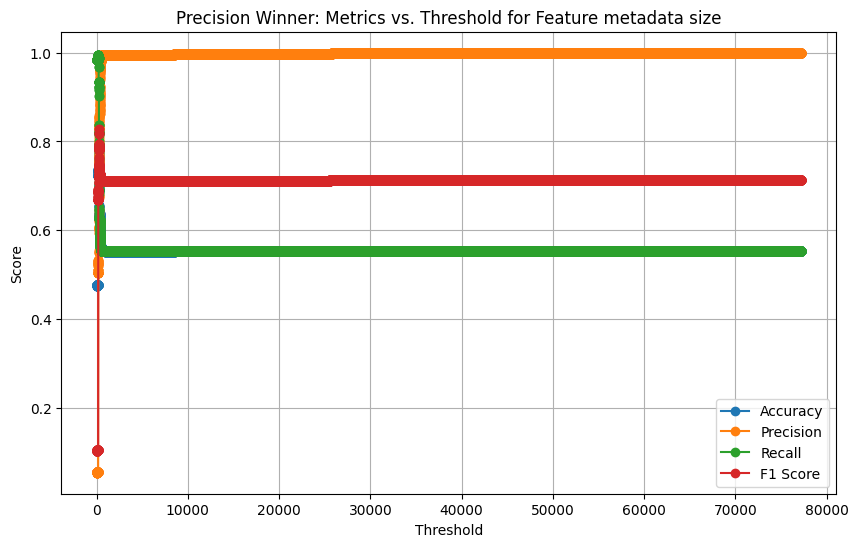

In [32]:
# Plot untuk Precision Winner
plot_metrics_for_winner(winner_precision, 'Precision')

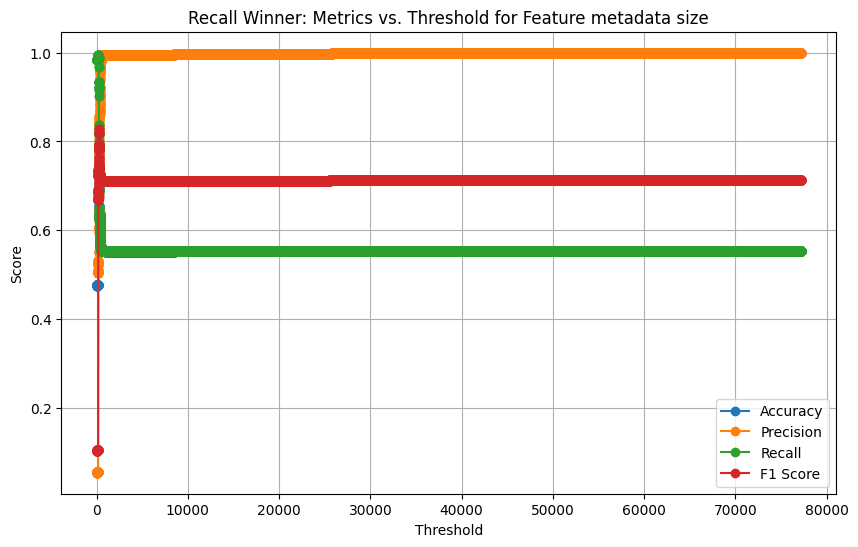

In [33]:
# Plot untuk Recall Winner
plot_metrics_for_winner(winner_recall, 'Recall')

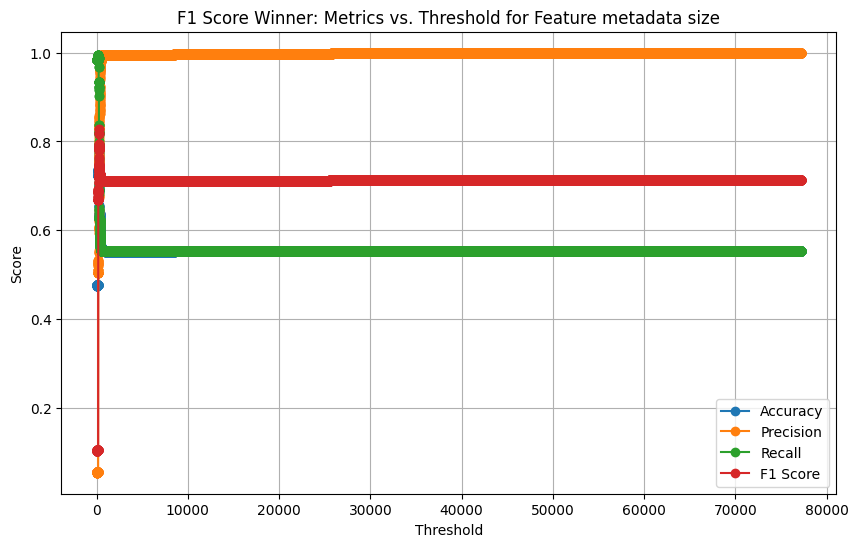

In [34]:
# Plot untuk F1-Score Winner
plot_metrics_for_winner(winner_f1_score, 'F1 Score')

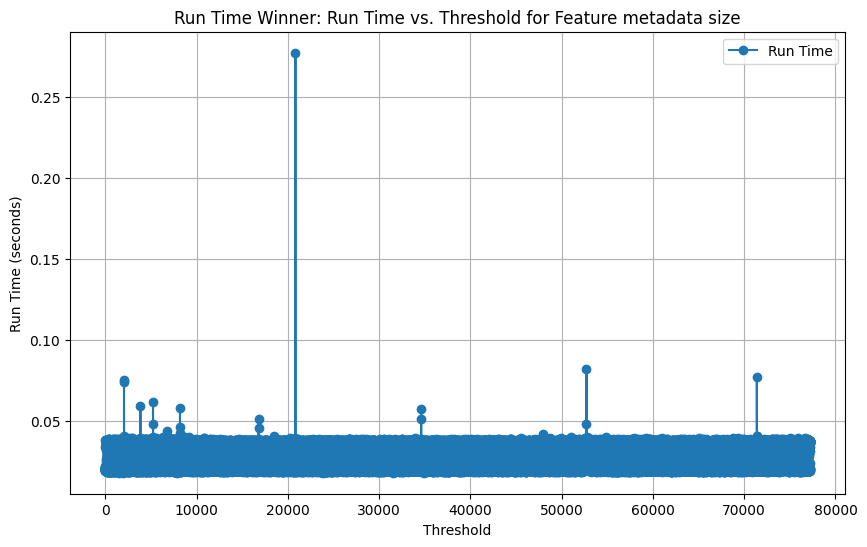

In [35]:
# Plot untuk Run Time Winner
plot_runtime_for_winner(winner_run_time)

In [36]:
# Output untuk setiap metrik
print(f"Precision terbaik dicapai dengan fitur {winner_precision[0]} dan threshold {winner_precision[1]}, menghasilkan precision {winner_precision[2]}.")
print(f"Recall terbaik dicapai dengan fitur {winner_recall[0]} dan threshold {winner_recall[1]}, menghasilkan recall {winner_recall[2]}.")
print(f"F1-score terbaik dicapai dengan fitur {winner_f1_score[0]} dan threshold {winner_f1_score[1]}, menghasilkan F1-score {winner_f1_score[2]}.")
print(f"Akurasi terbaik dicapai dengan fitur {winner_accuracy[0]} dan threshold {winner_accuracy[1]}, menghasilkan akurasi {winner_accuracy[2]}.")
print(f"Waktu running tercepat dicapai dengan fitur {winner_run_time[0]} dan threshold {winner_run_time[1]}, dengan waktu running {winner_run_time[2]} detik.")

Precision terbaik dicapai dengan fitur metadata size dan threshold 77185, menghasilkan precision 1.0.
Recall terbaik dicapai dengan fitur metadata size dan threshold 189, menghasilkan recall 0.994314143567875.
F1-score terbaik dicapai dengan fitur metadata size dan threshold 259, menghasilkan F1-score 0.828078524687686.
Akurasi terbaik dicapai dengan fitur metadata size dan threshold 259, menghasilkan akurasi 0.8270324189526185.
Waktu running tercepat dicapai dengan fitur metadata size dan threshold 31478, dengan waktu running 0.0178947448730468 detik.
